<a href="https://colab.research.google.com/github/Sudev1201/Major-project/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
path='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv'
df= pd.read_csv(path)
df

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0
...,...,...,...,...,...,...,...
138,India,2021-06-07,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,230490652,185501579,44989073
139,India,2021-06-08,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,233680929,188363894,45317035
140,India,2021-06-09,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,236856505,191222380,45634125
141,India,2021-06-10,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,240281903,194325996,45955907


In [23]:
df.columns

Index(['location', 'date', 'vaccine', 'source_url', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated'],
      dtype='object')

In [24]:
df.isnull().sum()

location                   0
date                       0
vaccine                    0
source_url                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

In [25]:
df=df.dropna()
df.head(100)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0
...,...,...,...,...,...,...,...
95,India,2021-04-22,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,132754608,113584269,19170339
96,India,2021-04-25,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,139185173,117795008,21390165
97,India,2021-04-26,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,142524947,119886252,22638695
98,India,2021-04-27,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,144879233,121263287,23615946


In [26]:
df.isnull().sum()

location                   0
date                       0
vaccine                    0
source_url                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 143 non-null    object
 1   date                     143 non-null    object
 2   vaccine                  143 non-null    object
 3   source_url               143 non-null    object
 4   total_vaccinations       143 non-null    int64 
 5   people_vaccinated        143 non-null    int64 
 6   people_fully_vaccinated  143 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.9+ KB


In [28]:
num_col = df.dtypes[df.dtypes!='object'].index.values
num_col

array(['total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated'], dtype=object)

In [29]:
num_col=df.dtypes[df.dtypes!='object'].index.values
cat_col = df.dtypes[df.dtypes!='object'].index.values

In [30]:
df.nunique()

location                     1
date                       143
vaccine                      1
source_url                  70
total_vaccinations         143
people_vaccinated          143
people_fully_vaccinated    115
dtype: int64

In [31]:
df['date']=pd.to_datetime(df['date'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 143 non-null    object        
 1   date                     143 non-null    datetime64[ns]
 2   vaccine                  143 non-null    object        
 3   source_url               143 non-null    object        
 4   total_vaccinations       143 non-null    int64         
 5   people_vaccinated        143 non-null    int64         
 6   people_fully_vaccinated  143 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.9+ KB


In [33]:
df.isnull().sum()

location                   0
date                       0
vaccine                    0
source_url                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

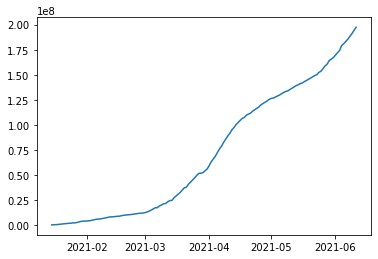

In [34]:
import matplotlib.pyplot as plt
plt.plot(df['date'].sort_values(),df['people_vaccinated'])



In [38]:
df_forecast=df.rename(columns={'people_vaccinated':'y','date':'ds'})

In [39]:
df_forecast


,location,ds,vaccine,source_url,total_vaccinations,y,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0
...,...,...,...,...,...,...,...
138,India,2021-06-07,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,230490652,185501579,44989073
139,India,2021-06-08,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,233680929,188363894,45317035
140,India,2021-06-09,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,236856505,191222380,45634125
141,India,2021-06-10,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,240281903,194325996,45955907


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


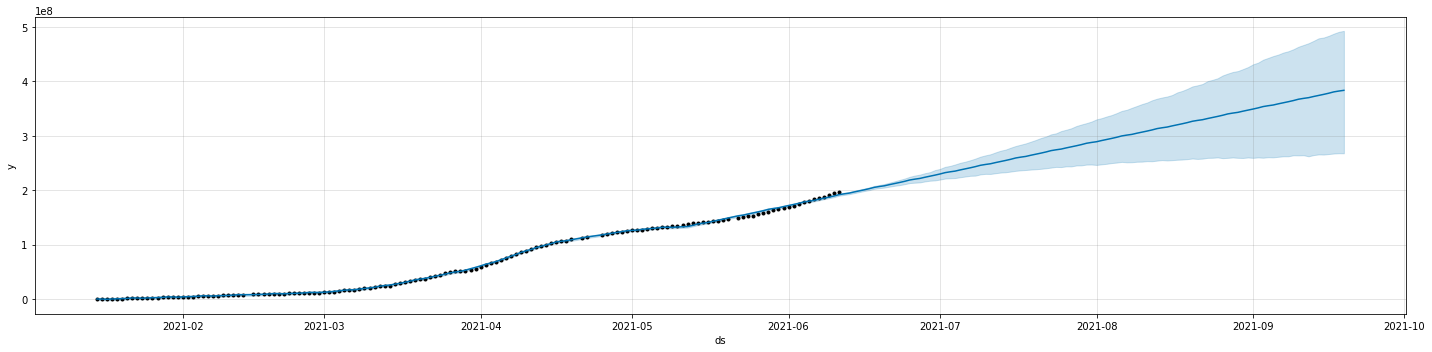

In [40]:
#forecasting people vaccinated
from fbprophet import Prophet 
model= Prophet(changepoint_prior_scale=0.2)
model.fit(df_forecast)
x = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(x)
df2=forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
df2
model.plot(forecast,figsize=(20,5));

In [41]:
#code for answering the questions
import pandas as pd
path='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df1= pd.read_csv(path)
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95262,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,2645.576,5.584,3.105,108.794,0.404,0.173,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2983.0,567969.0,38.214,0.201,2110.0,0.142,0.022,45.7,tests performed,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95263,ZWE,Africa,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,2653.044,7.468,3.854,109.131,0.336,0.221,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3427.0,571396.0,38.444,0.231,2231.0,0.150,0.026,38.9,tests performed,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95264,ZWE,Africa,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,3.143,2657.350,4.306,3.883,109.400,0.269,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2841.0,574237.0,38.636,0.191,2377.0,0.160,0.024,41.2,tests performed,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95267 entries, 0 to 95266
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               95267 non-null  object 
 1   continent                              90769 non-null  object 
 2   location                               95267 non-null  object 
 3   date                                   95267 non-null  object 
 4   total_cases                            92162 non-null  float64
 5   new_cases                              92159 non-null  float64
 6   new_cases_smoothed                     91149 non-null  float64
 7   total_deaths                           82167 non-null  float64
 8   new_deaths                             82323 non-null  float64
 9   new_deaths_smoothed                    91149 non-null  float64
 10  total_cases_per_million                91670 non-null  float64
 11  ne

In [50]:
df1['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [51]:
#df1['total_cases'] = df1['total_cases'].astype(int)
#df1['total_deaths'] = df1['total_deaths'].astype(int)
#df1['total_vaccinations'] = df1['total_vaccinations'].astype(int)


df2=df1[['location','date','total_cases', 'total_deaths', 'total_vaccinations']].copy()

df2
df2= df2[df2['location'] != 'World'] 
df2= df2[df2['location'] != 'Asia']
df2= df2[df2['location'] != 'Europe'] 
df2= df2[df2['location'] != 'Africa']  
df2= df2[df2['location'] != 'Australia'] 
df2= df2[df2['location'] != 'North America'] 
df2= df2[df2['location'] != 'South America'] 
print('\nResult dataframe :\n', 
      df2)



Result dataframe :
           location        date  total_cases  total_deaths  total_vaccinations
0      Afghanistan  2020-02-24          1.0           NaN                 NaN
1      Afghanistan  2020-02-25          1.0           NaN                 NaN
2      Afghanistan  2020-02-26          1.0           NaN                 NaN
3      Afghanistan  2020-02-27          1.0           NaN                 NaN
4      Afghanistan  2020-02-28          1.0           NaN                 NaN
...            ...         ...          ...           ...                 ...
95262     Zimbabwe  2021-06-08      39321.0        1617.0           1078809.0
95263     Zimbabwe  2021-06-09      39432.0        1622.0           1083983.0
95264     Zimbabwe  2021-06-10      39496.0        1626.0           1089506.0
95265     Zimbabwe  2021-06-11      39688.0        1629.0                 NaN
95266     Zimbabwe  2021-06-12      39852.0        1632.0                 NaN

[91769 rows x 5 columns]


In [ ]:

df2=df2.sort_values(['date'], ascending=[True])
df2

In [ ]:
#Which country/state is having highest number of cases?
high_case=df2.loc[df2['total_cases'].idxmax()]
print(high_case)
#Which country/state is having lowest number of cases?
low_case=df2.loc[df2['total_cases'].idxmin()]
print(low_case)


In [ ]:
#Which country/state is having highest number of deaths?
high_deaths=df2.loc[df2['total_deaths'].idxmax()]
print(high_deaths)
#Which country/state is having lowest number of deaths?
low_deaths=df2.loc[df2['total_deaths'].idxmin()]
print(low_deaths)

In [ ]:
#Which country/state is most vaccinated?
vac=df2.loc[df2['total_vaccinations'].idxmax()]
print(vac)